In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset (Assume 'asteroids.csv' is the dataset file)
data = pd.read_csv('/content/dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

<ipython-input-1-2ee018811bab>:5: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/dataset.csv')


         id    spkid       full_name pdes     name prefix neo pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN   N   N  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN   N   N  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN   N   N  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN   N   N  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN   N   N  6.90   

   diameter  ...       sigma_i      sigma_om       sigma_w      sigma_ma  \
0   939.400  ...  4.608900e-09  6.168800e-08  6.624800e-08  7.820700e-09   
1   545.000  ...  3.469400e-06  6.272400e-06  9.128200e-06  8.859100e-06   
2   246.596  ...  3.223100e-06  1.664600e-05  1.772100e-05  8.110400e-06   
3   525.400  ...  2.170600e-07  3.880800e-07  1.789300e-07  1.206800e-06   
4   106.699  ...  2.740800e-06  2.894900e-05  2.984200e-05  8.303800e-06   

       sigma_ad       sigma_n      sigma_tp     sigma_per  class      rms  
0  1.111300e-11 

In [ ]:
data.shape

(958524, 45)

In [ ]:
# Check the dataset info (data types, number of non-null values)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [ ]:
# Check for any missing values
print(data.isnull().sum())

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [ ]:
# Dropping irrelevant columns with too many missing values
data = data.drop(columns=['name', 'prefix'])


In [ ]:
# Fill missing values in 'neo' and 'pha' with the mode
data['neo'].fillna(data['neo'].mode()[0], inplace=True)
data['pha'].fillna(data['pha'].mode()[0], inplace=True)

<ipython-input-6-9bc2cae7760b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['neo'].fillna(data['neo'].mode()[0], inplace=True)
<ipython-input-6-9bc2cae7760b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
# Fill missing values in 'H' with the median
data['H'].fillna(data['H'].median(), inplace=True)

<ipython-input-7-59d19875b67a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['H'].fillna(data['H'].median(), inplace=True)


In [ ]:
# Impute 'diameter', 'albedo', 'diameter_sigma' with the median
data['diameter'].fillna(data['diameter'].median(), inplace=True)
data['albedo'].fillna(data['albedo'].median(), inplace=True)
data['diameter_sigma'].fillna(data['diameter_sigma'].median(), inplace=True)

<ipython-input-8-e738d9af8b83>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diameter'].fillna(data['diameter'].median(), inplace=True)
<ipython-input-8-e738d9af8b83>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Impute missing values in these columns with the median
cols_to_fill = ['ma', 'ad', 'per', 'per_y', 'rms']
for col in cols_to_fill:
    data[col].fillna(data[col].median(), inplace=True)

<ipython-input-9-bf85b2866c87>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
# Impute missing sigma values with the median
sigma_cols = ['sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per']
for col in sigma_cols:
    data[col].fillna(data[col].median(), inplace=True)


<ipython-input-10-9c65cd80387b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
# Impute missing values in 'moid' and 'moid_ld' with the median
data['moid'].fillna(data['moid'].median(), inplace=True)
data['moid_ld'].fillna(data['moid_ld'].median(), inplace=True)

<ipython-input-11-62d949df62e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['moid'].fillna(data['moid'].median(), inplace=True)
<ipython-input-11-62d949df62e2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Final check for missing values
print(data.isnull().sum())

id                0
spkid             0
full_name         0
pdes              0
neo               0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
equinox           0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


In [ ]:
# Drop unnecessary columns
columns_to_drop = ['id', 'spkid', 'full_name', 'pdes']
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

# Display the updated dataframe
data_cleaned.head()

,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'neo' and 'pha' columns
label_encoder = LabelEncoder()
data_cleaned['neo'] = label_encoder.fit_transform(data_cleaned['neo'])
data_cleaned['pha'] = label_encoder.fit_transform(data_cleaned['pha'])
data_cleaned['class'] = label_encoder.fit_transform(data_cleaned['class'])  # Target variable

# Check encoding
data_cleaned.head()

,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,0,0,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,8,0.43301
1,0,0,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,8,0.35936
2,0,0,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,8,0.33848
3,0,0,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,8,0.39980
4,0,0,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,8,0.52191


In [ ]:
data_cleaned['orbit_id'] = label_encoder.fit_transform(data_cleaned['orbit_id'])

In [ ]:
# Check encoding
data_cleaned.head()

,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,0,0,3.40,939.400,0.0900,0.200,517,2458600.5,58600,20190427.0,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,8,0.43301
1,0,0,4.20,545.000,0.1010,18.000,494,2459000.5,59000,20200531.0,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,8,0.35936
2,0,0,5.33,246.596,0.2140,10.594,323,2459000.5,59000,20200531.0,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,8,0.33848
3,0,0,3.00,525.400,0.4228,0.200,489,2458600.5,58600,20190427.0,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,8,0.39980
4,0,0,6.90,106.699,0.2740,3.140,325,2459000.5,59000,20200531.0,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,8,0.52191


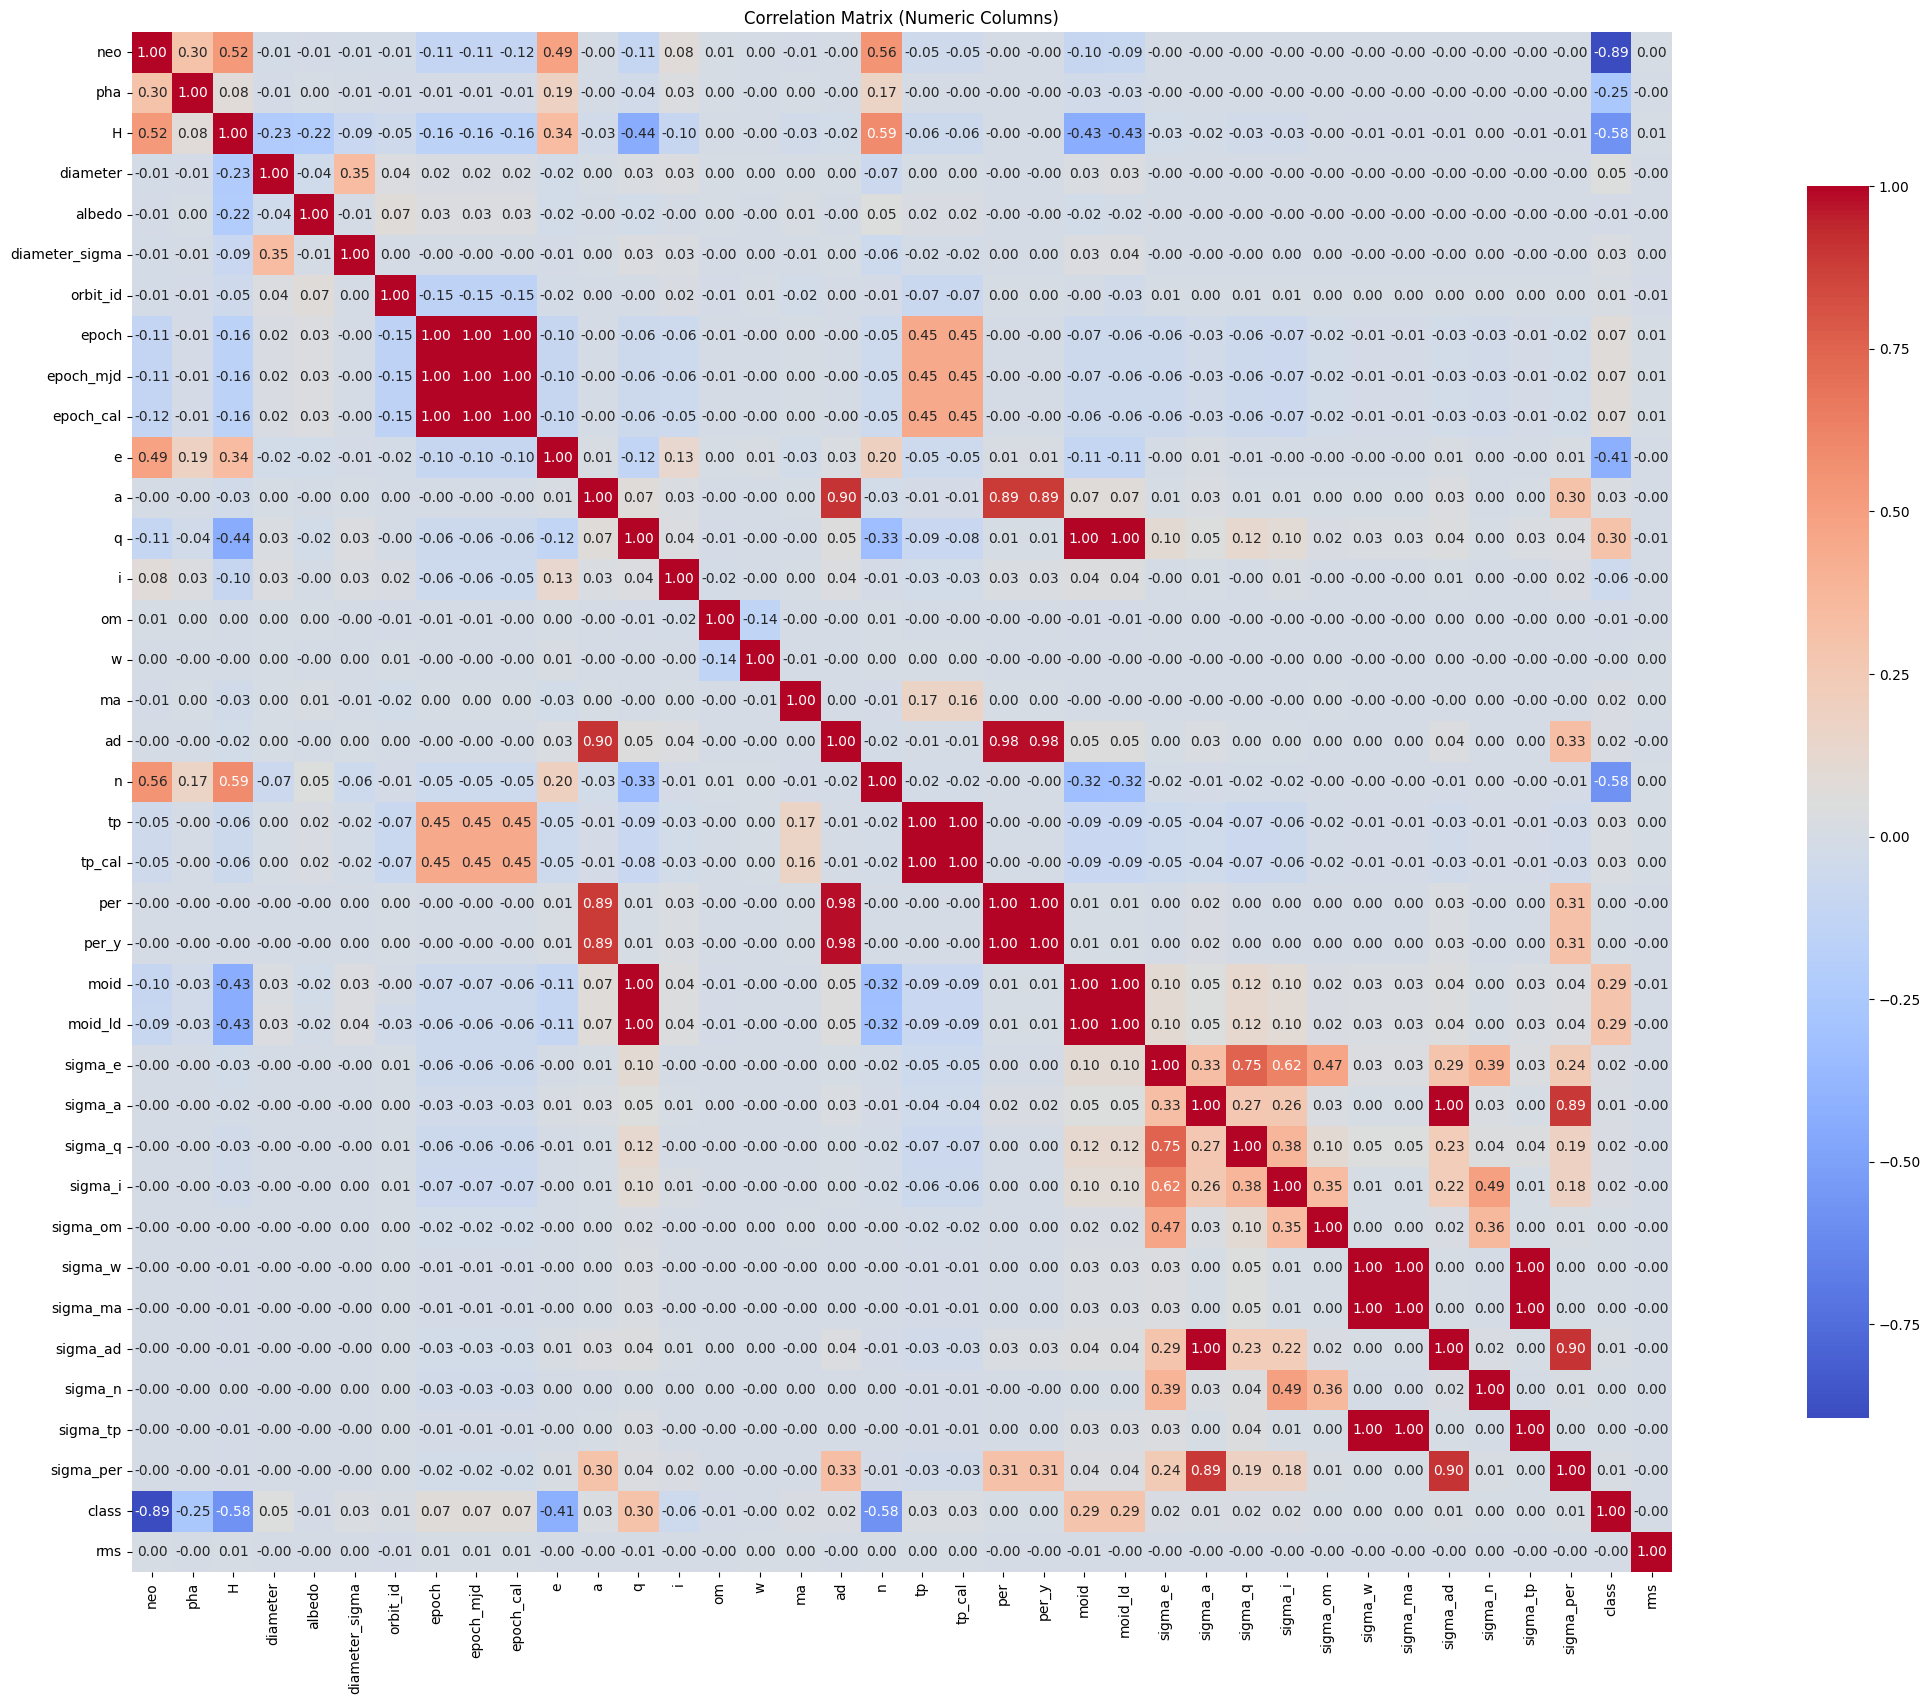

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'data_cleaned' is your cleaned DataFrame

# Step 1: Select only numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_numeric = data_cleaned[numeric_columns]

# Step 2: Calculate the correlation matrix for numeric features
correlation_matrix = data_numeric.corr()

# Step 3: Plot the correlation matrix
plt.figure(figsize=(35, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

<ipython-input-18-a22cbcbef13d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='class', palette='viridis')


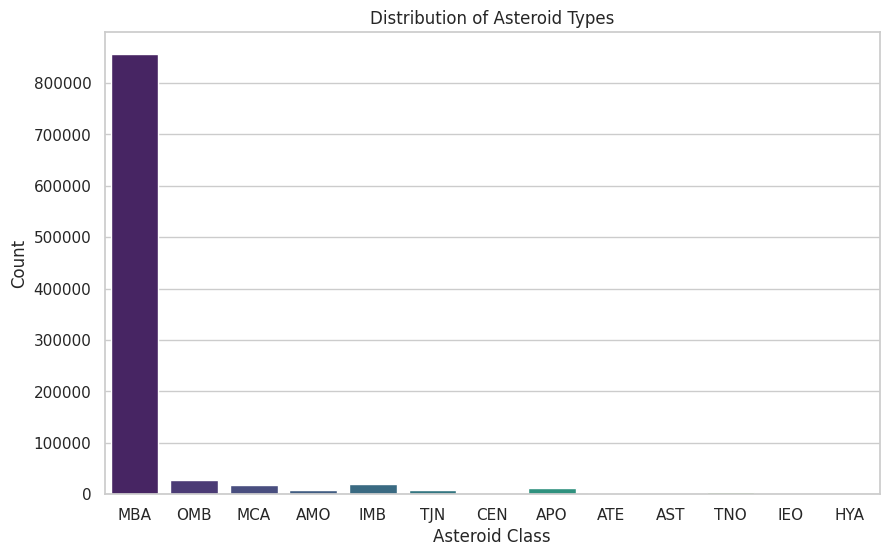

In [ ]:
import seaborn as sns
# Set the style for the visualizations
sns.set(style='whitegrid')

# 1. Bar Chart for Distribution of a Categorical Feature (e.g., 'class')
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='class', palette='viridis')
plt.title('Distribution of Asteroid Types')
plt.xlabel('Asteroid Class')
plt.ylabel('Count')
plt.show()